In [1]:
%matplotlib notebook
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import sklearn
# print sklearn.__version__
np.random.seed(seed=42)

# Part I: Indicator functions and least square fitting for classification

In [2]:
#Load some real data and check some statistics
iris_dataset = load_iris()
X = pd.DataFrame(iris_dataset.data)
y = (iris_dataset.target)
classes = list(set(y)) 
print classes

[0, 1, 2]


<IPython.core.display.Javascript object>


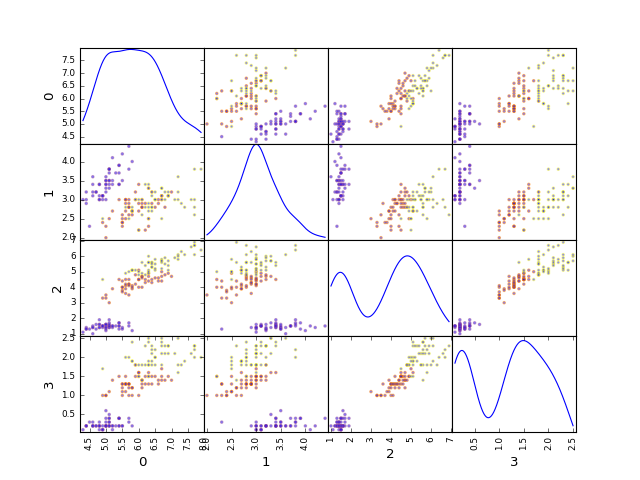

In [3]:
palette = [(153. / 255, 79. / 255, 161. / 255),
           (255. / 255, 129. / 255, 1. / 255),
           (253. / 255, 252. / 255, 51. / 255)]  # HEXA

color_map = dict(zip(classes, palette))
colors = [color_map[y[i]] for i in range(len(y))]
axeslist = pd.scatter_matrix(X, color=colors, diagonal='kde')

In [4]:
regr_0 = LinearRegression(fit_intercept=False)
regr_1 = LinearRegression(fit_intercept=False)
regr_2 = LinearRegression(fit_intercept=False)

# regr_0 = LinearRegression(fit_intercept=True)
# regr_1 = LinearRegression(fit_intercept=True)
# regr_2 = LinearRegression(fit_intercept=True)

# Classes are 0, 1 and 2
indexes_0 = np.squeeze(np.argwhere(y == 0))
y_0 = np.zeros(y.shape,)
y_0[indexes_0] = 1
# print y_0

indexes_1 = np.squeeze(np.argwhere(y == 1))
y_1 = np.zeros(y.shape)
y_1[indexes_1] = 1

indexes_2 = np.squeeze(np.argwhere(y == 2))
y_2 = np.zeros(y.shape)
y_2[indexes_2] = 1

x_to_class = np.array([4.9, 3.1, 1.5, 0.1]).reshape(1, -1)

regr_0 = regr_0.fit(X, y_0)
p_0 = regr_0.predict(x_to_class)

regr_1 = regr_1.fit(X, y_1)
p_1 = regr_1.predict(x_to_class)

regr_2 = regr_2.fit(X, y_2)
p_2 = regr_2.predict(x_to_class)

# Probatilities by class:
prob_by_classes = [p_0[0], p_1[0], p_2[0]]
print prob_by_classes

# Note that it can weirdly be a negative value, ie you estimate a probability
# by a negative number

print 'The winner is class ' + \
    str(np.argmax([p_0[0], p_1[0], p_2[0]])) + ', for x_to_class=' + str(x_to_class)

print "the sum of the weights is " + str(np.sum(prob_by_classes))


[0.85044983065319146, 0.30866278032421429, -0.19879400826986179]
The winner is class 0, for x_to_class=[[ 4.9  3.1  1.5  0.1]]
the sum of the weights is 0.960318602708


## Exercise : compare with the constant variable removed from the fitting

In [5]:
# TODO

## Exercise : write a function taking a data sets with label between 0 and K-1 implementing the method above

classi_ind_regr

input   : x_to_class, X, y, K=3

output  :label_pred, proba_vector

In [6]:
#TODO

In [7]:
# Solution is in module5_source.py if needed

## Simulated toy example:

In [8]:
n_samples = 100
X = np.zeros([3 * n_samples, 2])
mean_0 = [1, 1]
mean_1 = [2, 2]
mean_2 = [3, 3]
noise_level = 0.20
cov = noise_level * noise_level * np.array([[1, 0.5], [0.5, 1]])
X[0:n_samples, ] = np.random.multivariate_normal(mean_0, cov, n_samples)
X[n_samples: 2 * n_samples, ] = np.random.multivariate_normal(mean_1,
                                                              10 * cov, n_samples)
X[2 * n_samples:3 * n_samples, ] = np.random.multivariate_normal(mean_2, cov,
                                                                 n_samples)
y = np.zeros(3 * n_samples,)
y[n_samples:2 * n_samples] = 1
y[2 * n_samples:3 * n_samples, ] = 2
mat = np.array([[1, 1], [1, 1]])
# valeur_propre, vecteur_propre = np.linalg.eig(mat)
# print valeur_propre

<IPython.core.display.Javascript object>


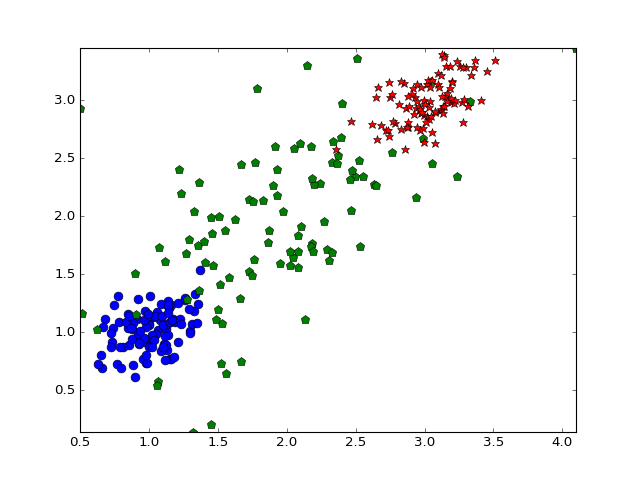

In [9]:
from module5_source import (classi_ind_regr, plot_2d, frontiere)

fig1 = plt.figure()
plot_2d(X, y)
plt.show()

display_1 = np.array([2, 2])
display_2 = np.array([3, 1])
display_2bis = np.array([3, 3])
display_2ter = np.array([1.5, 2.5])
display_2quad = np.array([1.5, 2])


In [10]:
values_proba1 = classi_ind_regr(display_1, X, y, k=3)[1]
values_proba2 = classi_ind_regr(display_2, X, y, k=3)[1]
values_proba2bis = classi_ind_regr(display_2bis, X, y, k=3)[1]
values_proba2ter = classi_ind_regr(display_2ter, X, y, k=3)[1]
values_proba2quad = classi_ind_regr(display_2quad, X, y, k=3)[1]

<IPython.core.display.Javascript object>


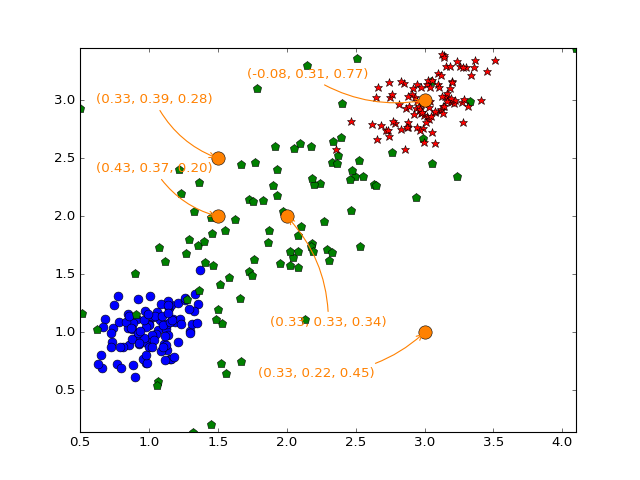

In [11]:
color_text = '#ff8101'
plt.figure()
plot_2d(X, y)
# resolution_param = 50  # 500 for nice plotting, 50 for fast version
# frontiere(lambda xx: my_clf.predict(xx.reshape(1, -1)), X, step=resolution_param)
plt.annotate(r'' + '(%.2f' % values_proba1[0] + ', %.2f' % values_proba1[1] +
             ', %.2f)' % values_proba1[2],
             xy=(display_1[0], display_1[1]), xycoords='data',
             color =color_text, xytext=(-15, -99), textcoords='offset points',
             fontsize=12, arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3,rad=.2", color=color_text))

plt.plot(display_1[0], display_1[1], 'o', color=color_text, markersize=12)

plt.annotate(r'' + '(%.2f' % values_proba2[0] + ', %.2f' % values_proba2[1] +
             ', %.2f)' % values_proba2[2], xy=(display_2[0], display_2[1]),
             xycoords='data', color =color_text, xytext=(-150, -40),
             textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3,rad=.2", color=color_text))

plt.plot(display_2[0], display_2[1], 'o', color=color_text, markersize=12)

plt.annotate(r'' + '(%.2f' % values_proba2bis[0] + ', %.2f'
             % values_proba2bis[1] + ', %.2f)' % values_proba2bis[2],
             xy=(display_2bis[0], display_2bis[1]), xycoords='data',
             color =color_text, xytext=(-160, 20), textcoords='offset points',
             fontsize=12, arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3,rad=.2", color=color_text))
plt.plot(display_2bis[0], display_2bis[1], 'o',
         color=color_text, markersize=12)

plt.annotate(r'' + '(%.2f' % values_proba2ter[0] + ', %.2f'
             % values_proba2ter[1] + ', %.2f)' % values_proba2ter[2],
             xy=(display_2ter[0], display_2ter[1]), xycoords='data',
             color=color_text, xytext=(-110, 50), textcoords='offset points',
             fontsize=12, arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3,rad=.2", color=color_text))
plt.plot(display_2ter[0], display_2ter[1], 'o', color=color_text,
         markersize=12)


plt.annotate(r'' + '(%.2f' % values_proba2quad[0] + ', %.2f'
             % values_proba2quad[1] + ', %.2f)' % values_proba2quad[2],
             xy=(display_2quad[0], display_2quad[1]), xycoords='data',
             color =color_text, xytext=(-110, 40), textcoords='offset points',
             fontsize=12, arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3,rad=.2", color=color_text))

plt.plot(display_2quad[0], display_2quad[1], 'o',
         color=color_text, markersize=12)
plt.draw()
plt.show()


## Ploting the underlying distribution: mixture of Gaussian

[[  7.64718703e-98   3.43576665e-97   1.52812509e-96 ...,   5.50368240e-54
    3.38060932e-54   2.05565345e-54]
 [  3.43576665e-97   1.54363852e-96   6.86563727e-96 ...,   2.47272211e-53
    1.51885716e-53   9.23574324e-54]
 [  1.52812509e-96   6.86563727e-96   3.05362780e-95 ...,   1.09979201e-52
    6.75541725e-53   4.10777925e-53]
 ..., 
 [  5.50368240e-54   2.47272211e-53   1.09979201e-52 ...,   3.96100159e-10
    2.43302537e-10   1.47945430e-10]
 [  3.38060932e-54   1.51885716e-53   6.75541725e-53 ...,   2.43302537e-10
    1.49447363e-10   9.08747386e-11]
 [  2.05565345e-54   9.23574324e-54   4.10777925e-53 ...,   1.47945430e-10
    9.08747386e-11   5.52583729e-11]]


<IPython.core.display.Javascript object>


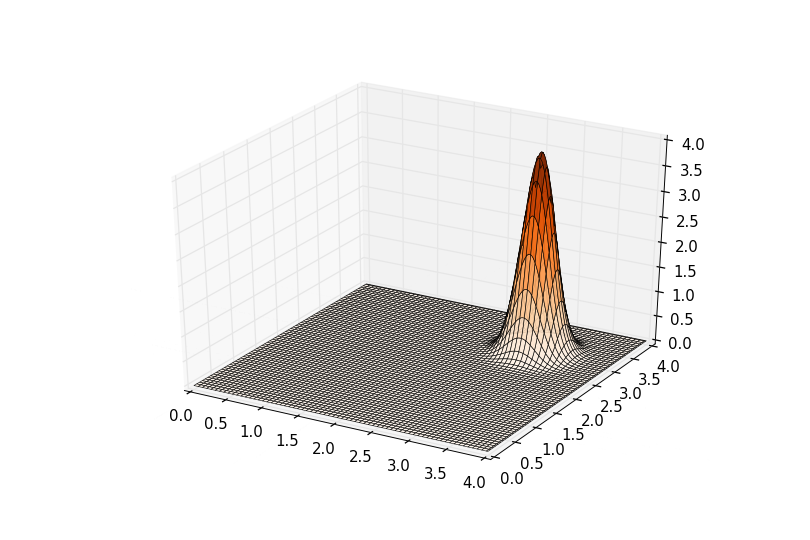

In [12]:
step = 200
xx = np.linspace(0, 4, step)
yy = xx
Xg, Yg = np.meshgrid(xx, yy)
# Z1 = plt.mlab.bivariate_normal(Xg, Yg, sigmax=noise_level, sigmay=noise_level,
#                                mux=mean_0[0], muy=mean_0[1], sigmaxy=0.0)
# Z2 = plt.mlab.bivariate_normal(Xg, Yg, sigmax=noise_level, sigmay=noise_level,
#                                mux=mean_1[0], muy=mean_1[1], sigmaxy=0.0)
Z3 = plt.mlab.bivariate_normal(Xg, Yg, sigmax=noise_level, sigmay=noise_level,
                               mux=mean_2[0], muy=mean_2[1], sigmaxy=0.0)
print Z3
# fig3 = plt.figure(figsize=(9, 6), dpi = 90)
# ax = fig3.add_subplot(111, projection='3d')
# ax.plot_surface(Xg, Yg, (Z1 + Z2 + Z3) / 3, cmap='Oranges',
#                 rstride=3, cstride=3, alpha=0.9, linewidth=0.5)
# plt.show()


# Z2 = plt.mlab.bivariate_normal(Xg, Yg, sigmax=noise_level,
#                                sigmay=noise_level, mux=mean_1[0],
#                                muy=mean_1[1], sigmaxy=0.0)

# fig3_bis = plt.figure(figsize=(9, 6), dpi = 90)
# ax = fig3_bis.add_subplot(111, projection='3d')
# ax.plot_surface(Xg, Yg, Z2, cmap='Oranges', rstride=3, cstride=3,
#                 alpha=0.9, linewidth=0.5)
# ax.set_zlim(0, 4)
# plt.show()


# Z3 = plt.mlab.bivariate_normal(Xg, Yg, sigmax=noise_level,
#                                sigmay=2 * noise_level, mux=mean_1[0],
#                                muy=mean_1[1], sigmaxy=0.0)


fig3_ter = plt.figure(figsize=(9, 6), dpi = 90)
ax = fig3_ter.add_subplot(111, projection='3d')
ax.plot_surface(Xg, Yg, Z3, cmap='Oranges', rstride=3, cstride=3,
                alpha=0.9, linewidth=0.5)
ax.set_zlim(0, 4)
plt.show()


# Z4 = plt.mlab.bivariate_normal(Xg, Yg, sigmax=noise_level,
#                                sigmay=noise_level * 2,
#                                mux=mean_2[0], muy=mean_2[1],
#                                sigmaxy=noise_level ** 2 / 2)

# fig3_quart = plt.figure(figsize=(9, 6), dpi = 90)
# ax = fig3_quart.add_subplot(111, projection='3d')
# ax.plot_surface(Xg, Yg, Z4, cmap='Oranges', rstride=3, cstride=3,
#                 alpha=0.9, linewidth=0.5)
# ax.set_zlim(0, 4)
plt.show()

#  Exo : Investigate the influence of noise_level on the previous method

In [13]:
# TODO

# Part II : Linear Discriminant Analysis (LDA)

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)
print clf.coef_
display_3 = np.array([2.5, 2.5])

values_proba_lda_1 = clf.predict_proba(display_1.reshape(1, -1))[0]
values_proba_lda_2 = np.exp(clf.predict_log_proba(display_2.reshape(1, -1)))[0]
values_proba_lda_3 = np.exp(clf.predict_log_proba(display_3.reshape(1, -1)))[0]
print values_proba_lda_1

[[-4.3139343  -3.38658192]
 [-0.42728659 -0.03098634]
 [ 4.74122089  3.41756826]]
[ 0.02777095  0.9501526   0.02207645]


<IPython.core.display.Javascript object>


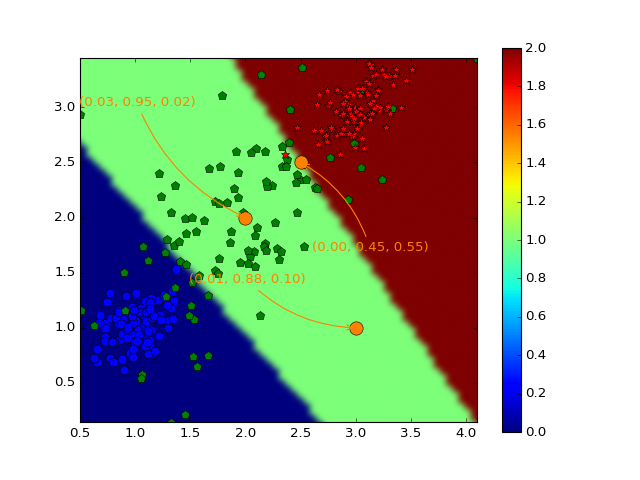

In [18]:
fig2 = plt.figure()
plot_2d(X, y)
resolution_param = 100  # 500 for nice plotting, 50 for fast version
frontiere(lambda xx: clf.predict(xx.reshape(1, -1)), X, step=resolution_param)
plt.annotate(r'' + '(%.2f' % values_proba_lda_1[0] + ', %.2f'
             % values_proba_lda_1[1] + ', %.2f)' % values_proba_lda_1[2],
             xy=(display_1[0], display_1[1]), xycoords='data',
             color =color_text, xytext=(-150, 100), textcoords='offset points',
             fontsize=12, arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3,rad=.2", color=color_text))


plt.plot(display_1[0], display_1[1], 'o', color=color_text, markersize=12)

plt.annotate(r'' + '(%.2f' % values_proba_lda_2[0] + ', %.2f'
             % values_proba_lda_2[1] + ', %.2f)' % values_proba_lda_2[2],
             xy=(display_2[0], display_2[1]), xycoords='data',
             color =color_text, xytext=(-150, 40), textcoords='offset points',
             fontsize=12, arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3,rad=.2", color=color_text))


plt.plot(display_2[0], display_2[1], 'o', color=color_text, markersize=12)


plt.annotate(r'' + '(%.2f' % values_proba_lda_3[0] + ', %.2f'
             % values_proba_lda_3[1] + ', %.2f)' % values_proba_lda_3[2],
             xy=(display_3[0], display_3[1]), xycoords='data',
             color =color_text, xytext=(10, -80), textcoords='offset points',
             fontsize=12, arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3,rad=.2", color=color_text))

plt.plot(display_3[0], display_3[1], 'o', color=color_text, markersize=12)

plt.show()

# Part III : Quadratic Discriminant Analysis (QDA)

<IPython.core.display.Javascript object>


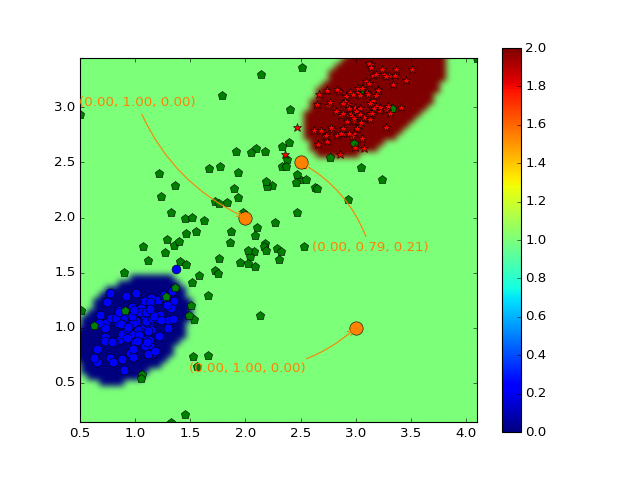

In [24]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(X, y)

display_3 = np.array([2.5, 2.5])

values_proba_qda_1 = (clf.predict_proba(display_1.reshape(1, -1)))[0]
values_proba_qda_2 = (clf.predict_proba(display_2.reshape(1, -1)))[0]
values_proba_qda_3 = (clf.predict_proba(display_3.reshape(1, -1)))[0]

fig3 = plt.figure()
plot_2d(X, y)
frontiere(lambda xx: clf.predict(xx.reshape(1, -1)), X, step=resolution_param)
plt.annotate(r'' + '(%.2f' % values_proba_qda_1[0] + ', %.2f'
             % values_proba_qda_1[1] + ', %.2f)' % values_proba_qda_1[2],
             xy=(display_1[0], display_1[1]), xycoords='data',
             color=color_text, xytext=(-150, +100), textcoords='offset points',
             fontsize=12, arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3,rad=.2", color=color_text))

plt.plot(display_1[0], display_1[1], 'o', color=color_text, markersize=12)
plt.annotate(r'' + '(%.2f' % values_proba_qda_2[0] + ', %.2f'
             % values_proba_qda_2[1] + ', %.2f)' % values_proba_qda_2[2],
             xy=(display_2[0], display_2[1]), xycoords='data',
             color =color_text, xytext=(-150, -40), textcoords='offset points',
             fontsize=12, arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3,rad=.2", color=color_text))
plt.plot(display_2[0], display_2[1], 'o', color=color_text, markersize=12)
plt.annotate(r'' + '(%.2f' % values_proba_qda_3[0] + ', %.2f'
             % values_proba_qda_3[1] + ', %.2f)' % values_proba_qda_3[2],
             xy=(display_3[0], display_3[1]), xycoords='data',
             color =color_text, xytext=(10, -80), textcoords='offset points',
             fontsize=12, arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3,rad=.2", color=color_text))
plt.plot(display_3[0], display_3[1], 'o', color=color_text, markersize=12)

plt.show()


## EXERCICE: Test QDA vs LDA for the IRIS dataset, using training/testing set with ratio 80%/20%. 

In [26]:
# Hint: consider the train_test_split in sklearn

# cross_validation.train_test_split

#Part IV: Gaussian Naive Bayes

<IPython.core.display.Javascript object>


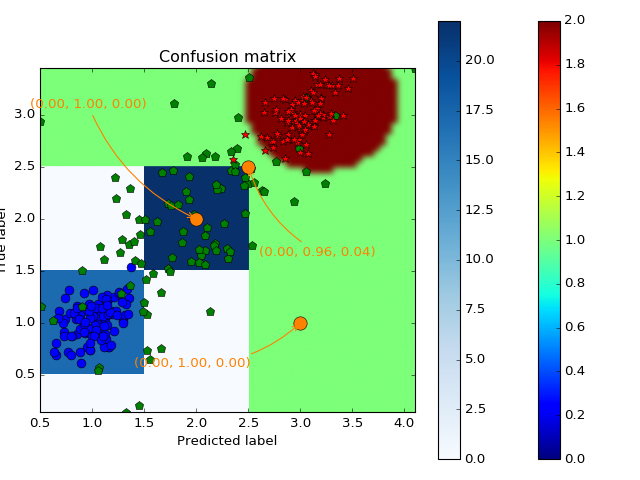

In [29]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, y)

display_3 = np.array([2.5, 2.5])

values_proba_gnb_1 = (clf.predict_proba(display_1.reshape(1, -1)))[0]
values_proba_gnb_2 = (clf.predict_proba(display_2.reshape(1, -1)))[0]
values_proba_gnb_3 = (clf.predict_proba(display_3.reshape(1, -1)))[0]

fig1_bis = plt.figure()
plot_2d(X, y)
frontiere(lambda xx: clf.predict(xx.reshape(1, -1)), X, step=resolution_param)
plt.annotate(r'' + '(%.2f' % values_proba_gnb_1[0] + ', %.2f'
             % values_proba_gnb_1[1] + ', %.2f)' % values_proba_gnb_1[2],
             xy=(display_1[0], display_1[1]), xycoords='data',
             color =color_text, xytext=(-150, +100),
             textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2",
                             color=color_text))

plt.plot(display_1[0], display_1[1], 'o', color=color_text, markersize=12)
plt.annotate(r'' + '(%.2f' % values_proba_gnb_2[0] + ', %.2f'
             % values_proba_gnb_2[1] + ', %.2f)' % values_proba_gnb_2[2],
             xy=(display_2[0], display_2[1]), xycoords='data',
             color =color_text, xytext=(-150, -40),
             textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2",
                             color=color_text))

plt.plot(display_2[0], display_2[1], 'o', color=color_text, markersize=12)
plt.annotate(r'' + '(%.2f' % values_proba_gnb_3[0] + ', %.2f'
             % values_proba_gnb_3[1] + ', %.2f)' % values_proba_gnb_3[2],
             xy=(display_3[0], display_3[1]), xycoords='data',
             color =color_text, xytext=(10, -80), textcoords='offset points',
             fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2",
                             color=color_text))
plt.plot(display_3[0], display_3[1], 'o', color=color_text, markersize=12)

plt.show()

# Exo : compute the confusion matrix for this method

In [30]:
# Hint: sklearn has it
from  sklearn.cross_validation import train_test_split
from  sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#clf=...
clf.fit(X_train, y_train)

cm = confusion_matrix(y_test, clf.predict(X_test))

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(cm)
print cm

[[20  0  0]
 [ 1 17  0]
 [ 0  0 22]]


# Part IV : Logistic regression

<IPython.core.display.Javascript object>


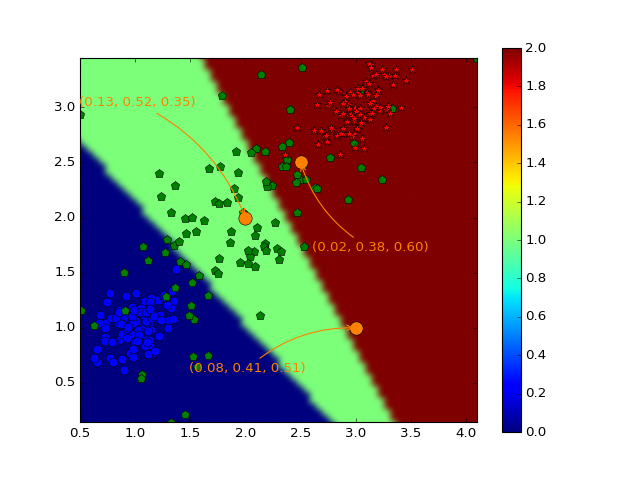

In [31]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, y)

display_3 = np.array([2.5, 2.5])

values_proba_logi_1 = (clf.predict_proba(display_1.reshape(1, -1)))[0]
values_proba_logi_2 = (clf.predict_proba(display_2.reshape(1, -1)))[0]
values_proba_logi_3 = (clf.predict_proba(display_3.reshape(1, -1)))[0]

fig4 = plt.figure()
plot_2d(X, y)
frontiere(lambda xx: clf.predict(xx.reshape(1, -1)), X, step=resolution_param)

plt.annotate(r'' + '(%.2f' % values_proba_logi_1[0] + ', %.2f'
             % values_proba_logi_1[1] + ', %.2f)' % values_proba_logi_1[2],
             xy=(display_1[0], display_1[1]), xycoords='data',
             color =color_text, xytext=(-150, +100),
             textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2",
                             color=color_text))

plt.plot(display_1[0], display_1[1], 'o', color=color_text, markersize=12)
plt.annotate(r'' + '(%.2f' % values_proba_logi_2[0] + ', %.2f'
             % values_proba_logi_2[1] + ', %.2f)' % values_proba_logi_2[2],
             xy=(display_2[0], display_2[1]), xycoords='data',
             color =color_text, xytext=(-150, -40), textcoords='offset points',
             fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2",
                             color=color_text))
plt.plot(display_2[0], display_2[1], 'o', color=color_text, markersize=12)
plt.annotate(r'' + '(%.2f' % values_proba_logi_3[0] + ', %.2f'
             % values_proba_logi_3[1] + ', %.2f)' % values_proba_logi_3[2],
             xy=(display_3[0], display_3[1]), xycoords='data',
             color =color_text, xytext=(10, -80), textcoords='offset points',
             fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2",
                             color=color_text))
plt.plot(display_3[0], display_3[1], 'o', color=color_text, markersize=12)

plt.show()

## Exercise: Are LogisticRegression and LDA the same on this example?

## Exercise: investigate http://nbviewer.ipython.org/github/cs109/content/blob/master/labs/lab4/Lab4full.ipynb (Part 2)

What do you think is the C parameter?

Determine its influence, by changing its value


# PART V: K-Nearest Neighboors (KNN)

<IPython.core.display.Javascript object>


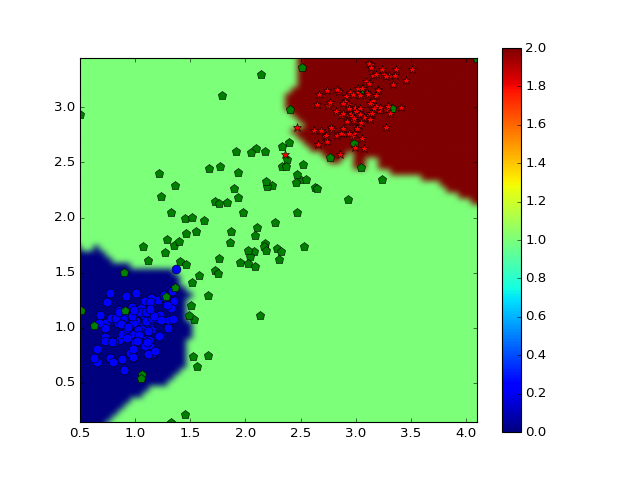

In [32]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X, y)
# KNeighborsClassifier?
display_3 = np.array([2.5, 2.5])

fig5 = plt.figure()
plot_2d(X, y)
frontiere(lambda xx: clf.predict(xx.reshape(1,-1)), X, step=resolution_param)
plt.show()

In [ ]:
# BEWARE: now it's not that easy to get the probability estimates

## Exercice : change the number of neighboors considered in the previous exemple. What is defaut value in KNeighborsClassifier?

## Exercice: perform a comparison between knn and Logistic Regression on IRIS, using the same training/testing set with ratio 80%/20%. 